This notebook is meant to observe and explore the principle the work is about.

In [1]:
using LinearAlgebra
using DifferentialEquations
using Plots
#using GR

commutator(a, b) = a*b - b*a
anticommutator(a,b) = a*b + b*a

limb_form(Operator, rho) = (Operator * rho * adjoint(Operator)) - 0.5 * anticommutator(adjoint(Operator) * Operator, rho)

const kb_unit_converter = 0.6950348
const cm_inv_to_eV_converter = 8065.544

8065.544

Firsty, some useful definitions

In [2]:
n_qbit = 4

J = 100

qbit_basis = [zeros(ComplexF64, n_qbit) for _ in 1:n_qbit]            #Base nel sottospazio di singole eccitazioni

for i in 1:n_qbit
     qbit_basis[i][i] = 1.0
end         

E_i = ComplexF64[0, 300, 300, 0]

J_ij = [0 0 0 0
     0 0 J 0
     0 J 0 0
     0 0 0 0]                                                         #Coupling matrix editabile a mano

H_electronic =  zeros(ComplexF64, n_qbit, n_qbit)

for i in 1:n_qbit
     H_electronic[i, i] = E_i[i]
end

H_electronic = H_electronic + J_ij          

D = 6                                                  #Troncamento dell'oscillatore armonico

I_ho = Matrix(I, D, D)                                 #Per comodità

I_qbit = Matrix(I, n_qbit, n_qbit)

omega = 200 + 55 * sqrt(2/3)                                           #Frequenza dell'oscillatore armonico

ho_basis = [zeros(ComplexF64, D) for _ in 1:D]         #Base dell'oscillatore legato al qbit 2

for i in 1:D
     ho_basis[i][i] = 1.0
end

#ho_3_basis = ho_2_basis                               #La base ha la stessa forma

a = zeros(ComplexF64, D, D)

for i in 1:D-1
     a[i, i+1] = sqrt(i)
end

a_dagger = adjoint(a)                                  #Operatori creazione e distruzione degli oscillatori armonici

H_ho = omega * a_dagger * a                            #Hamiltoniana dell'oscillatore armonico

g2 = 55
g3 = 55

#g2 = g3 = 55                                                 #Coupling tra oscillatori e qbit

H_interaction = kron(qbit_basis[2] * adjoint(qbit_basis[2]), g2 * (a + a_dagger), I_ho) + 
                kron(qbit_basis[3] * adjoint(qbit_basis[3]), I_ho, g3 * (a + a_dagger))

H_tot = kron(H_electronic, I_ho, I_ho) +
        kron(I_qbit, H_ho, I_ho) +
        kron(I_qbit, I_ho, H_ho) +
        H_interaction

Hamiltonian(t) = H_tot

#Pop devo implementare i population shift e tutte le cose di limblad

#Limb_ho = 

function rho_primo(rho, p, t) 
     H_t = Hamiltonian(t)
     return -1im * commutator(rho, H_t)
end

ho_2_state = 1                                           #Eccitazione iniziale ho

rho0_ho_2 = ho_basis[ho_2_state] * adjoint(ho_basis[ho_2_state])

ho_3_state = 1                                           #Eccitazione iniziale ho

rho0_ho_3 = ho_basis[ho_3_state] * adjoint(ho_basis[ho_3_state])

excited_qbit = 1                                                      #Qbit eccitato a t=0

rho0_electronic = qbit_basis[excited_qbit] * adjoint(qbit_basis[excited_qbit])              #Matrice densità elettronica  

eigen_basis = copy(qbit_basis)

eigen_basis[2] = (qbit_basis[2] + qbit_basis[3])/sqrt(2)  
eigen_basis[3] = (qbit_basis[2] - qbit_basis[3])/sqrt(2)

rho0_electronic = eigen_basis[2] * adjoint(eigen_basis[2])

#rho0_electronic = ComplexF64[0.0 0.0 0.0 0.0;
#                  0.0 1/2 -1/2 0.0;
#                  0.0 -1/2 1/2 0.0;
#                  0.0 0.0 0.0 0.0]

a_2 = kron(I_qbit, a, I_ho)
a_3 = kron(I_qbit, I_ho, a)
a_dagger_2 = kron(I_qbit, a_dagger, I_ho)
a_dagger_3 = kron(I_qbit, I_ho, a_dagger)

a_anti = (a_2 - a_3)/sqrt(2)
a_dagger_anti = adjoint(a_anti)

a_simm = (a_2 + a_3)/sqrt(2)
a_dagger_simm = adjoint(a_simm)

rho0 = kron(rho0_electronic, rho0_ho_2, rho0_ho_3)

144×144 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
    ⋮                             ⋱                        
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0

Then, we construct the Hamiltonian and the initial state

In [3]:
tspan = (0.0, 0.3)
prob = ODEProblem(rho_primo, rho0, tspan)
sol = solve(prob, Tsit5(), reltol = 1e-8, abstol = 1e-8)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 357-element Vector{Float64}:
 0.0
 0.0011543719827458471
 0.0016648366077066995
 0.0024884421682502883
 0.0031739326483305333
 0.003959900418981978
 0.004720776508403903
 0.005516802626530322
 0.00631328021068544
 0.007124436721815529
 ⋮
 0.29361252375371394
 0.2944574082496673
 0.29530225041385444
 0.2961470735400014
 0.2969918956746233
 0.2978367343311707
 0.298681603239074
 0.29952651393406826
 0.3
u: 357-element Vector{Matrix{ComplexF64}}:
 [0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im]
 [0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im]
 [0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0

This is the differential equation solver

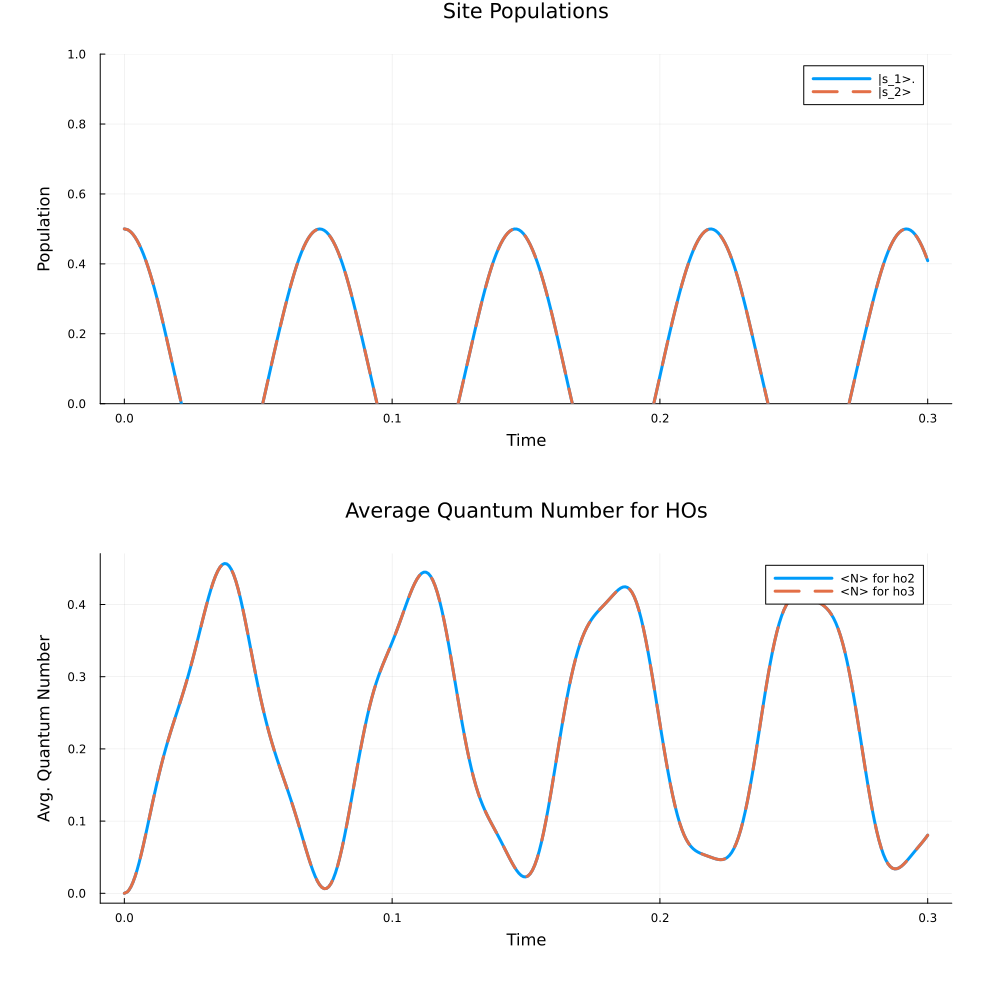

In [ ]:
# Time points from the solution
times = sol.t

# 1. Qubit Populations
P_q2_full = kron(qbit_basis[2] * adjoint(qbit_basis[2]), I_ho, I_ho)
P_q3_full = kron(qbit_basis[3] * adjoint(qbit_basis[3]), I_ho, I_ho)
pop_q2_t = [real(tr(rho_t * P_q2_full)) for rho_t in sol.u]
pop_q3_t = [real(tr(rho_t * P_q3_full)) for rho_t in sol.u]
plot_qubit_pops = Plots.plot(times, pop_q2_t, label="|s_1>.", xlabel="Time", ylabel="Population", legend=:topright,  ylims=(0.0, 1.0))
plot!(plot_qubit_pops, times, pop_q3_t, label="|s_2>", linestyle=:dash)
title!(plot_qubit_pops, "Site Populations")

# 2. Harmonic Oscillator 2 (ho2) Populations
pop_ho2_states_t = zeros(length(times), D)
for k_idx in 1:D
    projector_ho_n_state = ho_basis[k_idx] * adjoint(ho_basis[k_idx])
    P_ho2_n_full = kron(I_qbit, projector_ho_n_state, I_ho)
    for (i, rho_t) in enumerate(sol.u)
        pop_ho2_states_t[i, k_idx] = real(tr(rho_t * P_ho2_n_full))
    end
end

# MODIFIED: Changed legend and optionally limit plotted states
plot_ho2_pops = Plots.plot(xlabel="Time", ylabel="Population", title="ho1 Populations)", legend=:topright) # Changed legend
max_ho_states_to_display = min(D, 4) # Example: limit to 4 states in legend
for k_idx in 1:max_ho_states_to_display # Loop only up to a certain number
    number_state_n = k_idx - 1
    plot!(plot_ho2_pops, times, pop_ho2_states_t[:, k_idx], label="ho1 |$(number_state_n)>")
end

# 3. Harmonic Oscillator 3 (HO3) Populations
pop_ho3_states_t = zeros(length(times), D)
for k_idx in 1:D
    projector_ho_n_state = ho_basis[k_idx] * adjoint(ho_basis[k_idx])
    P_ho3_n_full = kron(I_qbit, I_ho, projector_ho_n_state)
    for (i, rho_t) in enumerate(sol.u)
        pop_ho3_states_t[i, k_idx] = real(tr(rho_t * P_ho3_n_full))
    end
end

# MODIFIED: Changed legend and optionally limit plotted states
plot_ho3_pops = Plots.plot(xlabel="Time", ylabel="Population", title="ho3 Populations (Qubit 3)", legend=:topright) # Changed legend
# max_ho_states_to_display = min(D, 4) # Already defined, or redefine if different for ho3
for k_idx in 1:max_ho_states_to_display # Loop only up to a certain number
    number_state_n = k_idx - 1
    plot!(plot_ho3_pops, times, pop_ho3_states_t[:, k_idx], label="ho3 |$(number_state_n)>")
end

# 4. Average Quantum Numbers
N_op_ho = a_dagger * a
N_op_ho2_full = kron(I_qbit, N_op_ho, I_ho)
N_op_ho3_full = kron(I_qbit, I_ho, N_op_ho)
avg_N_ho2_t = [real(tr(rho_t * N_op_ho2_full)) for rho_t in sol.u]
avg_N_ho3_t = [real(tr(rho_t * N_op_ho3_full)) for rho_t in sol.u]
plot_avg_N_ho = Plots.plot(times, avg_N_ho2_t, label="<N> for ho2", xlabel="Time", ylabel="Avg. Quantum Number", legend=:topright)
plot!(plot_avg_N_ho, times, avg_N_ho3_t, label="<N> for ho3", linestyle=:dash)
title!(plot_avg_N_ho, "Average Quantum Number for HOs")


# MODIFIED: Final plot call with adjusted size and margins
plot_width = 1000
plot_height = 1000 
Plots.plot(plot_qubit_pops, plot_avg_N_ho, #plot_ho2_pops, plot_ho3_pops,
           layout = (2, 1),
           size=(plot_width, plot_height),
           linewidth=3,
           left_margin=10Plots.mm,
           bottom_margin=10Plots.mm,
           right_margin=10Plots.mm, # Ensure space for legends if they end up near right edge
           top_margin=5Plots.mm
          )

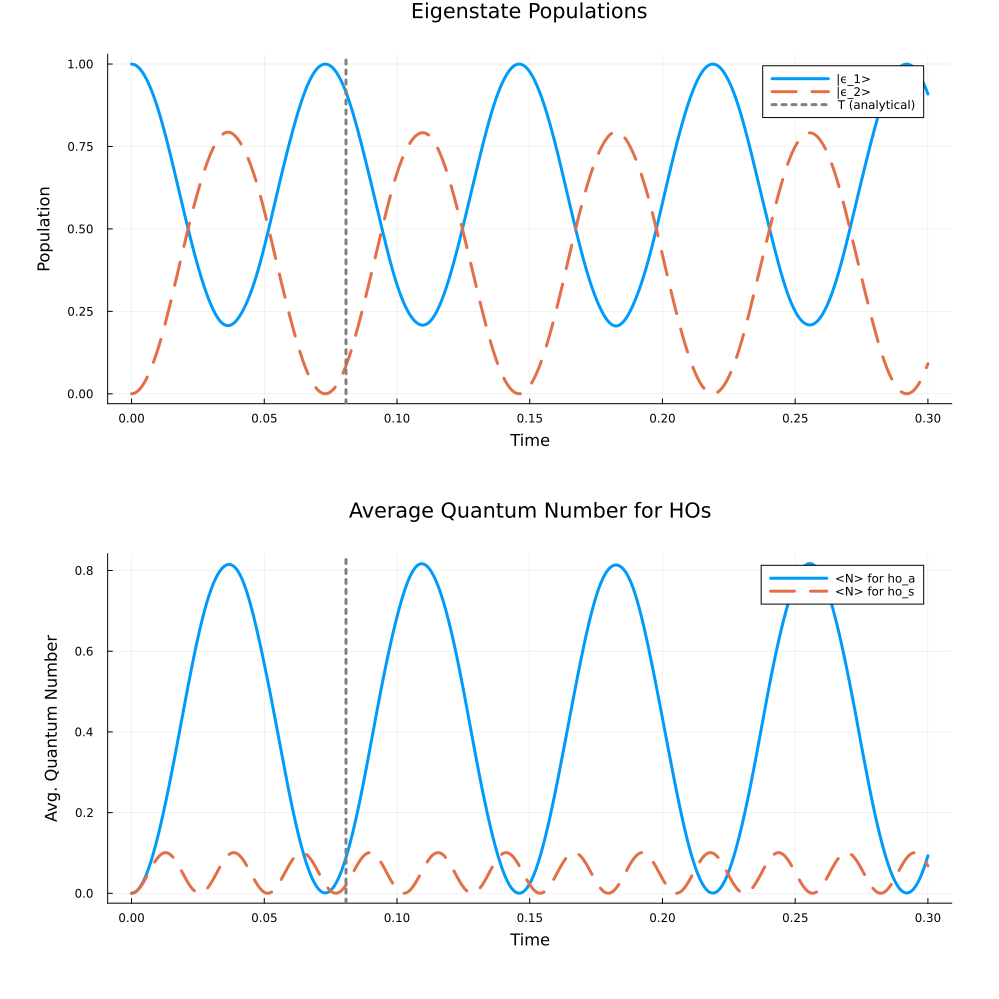

In [27]:
# --- SETUP NEW PLOTTING VARIABLES ---
# Define your custom ticks (e.g., every 0.05 units)
custom_ticks = 0:0.05:0.3 
# Define where you want the vertical line
v_line_x = [2*pi/(sqrt(2)g2)] 

# 1. Qubit Populations
P_q2_full = kron(eigen_basis[2] * adjoint(eigen_basis[2]), I_ho, I_ho)
P_q3_full = kron(eigen_basis[3] * adjoint(eigen_basis[3]), I_ho, I_ho)
pop_q2_t = [real(tr(rho_t * P_q2_full)) for rho_t in sol.u]
pop_q3_t = [real(tr(rho_t * P_q3_full)) for rho_t in sol.u]

# MODIFIED: Added xticks
plot_qubit_pops = Plots.plot(times, pop_q2_t, 
    label="|ϵ_1>", 
    xlabel="Time", 
    ylabel="Population", 
    legend=:topright, 
    linestyle=:solid,
    xticks = custom_ticks # <--- APPLIED HERE
)
plot!(plot_qubit_pops, times, pop_q3_t, label="|ϵ_2>", linestyle=:dash)

# MODIFIED: Added vertical line
vline!(plot_qubit_pops, v_line_x, linestyle=:dot, color=:grey, label="T (analytical)") 

title!(plot_qubit_pops, "Eigenstate Populations")

# ... [Code for Section 2 and 3 omitted for brevity, apply xticks there if needed] ...

# 4. Average Quantum Numbers
N_op_ho = a_dagger_anti * a_anti
N_op_ho_s = a_dagger_simm * a_simm
avg_N_ho2_t = [real(tr(rho_t * N_op_ho)) for rho_t in sol.u]
avg_N_ho3_t = [real(tr(rho_t * N_op_ho_s)) for rho_t in sol.u]

# MODIFIED: Added xticks
plot_avg_N_ho = Plots.plot(times, avg_N_ho2_t, 
    label="<N> for ho_a", 
    xlabel="Time", 
    ylabel="Avg. Quantum Number", 
    legend=:topright, 
    linestyle=:solid,
    xticks = custom_ticks # <--- APPLIED HERE
)
plot!(plot_avg_N_ho, times, avg_N_ho3_t, label="<N> for ho_s", linestyle=:dash)

# MODIFIED: Added vertical line to this plot as well
vline!(plot_avg_N_ho, v_line_x, linestyle=:dot, color=:grey, label="") 

title!(plot_avg_N_ho, "Average Quantum Number for HOs")

# FINAL LAYOUT
plot_width = 1000 
plot_height = 1000 
Plots.plot(plot_qubit_pops, plot_avg_N_ho,
           layout = (2, 1),
           size=(plot_width, plot_height),
           linewidth=3,
           left_margin=10Plots.mm,
           bottom_margin=10Plots.mm,
           right_margin=10Plots.mm,
           top_margin=5Plots.mm
          )

# Detuning

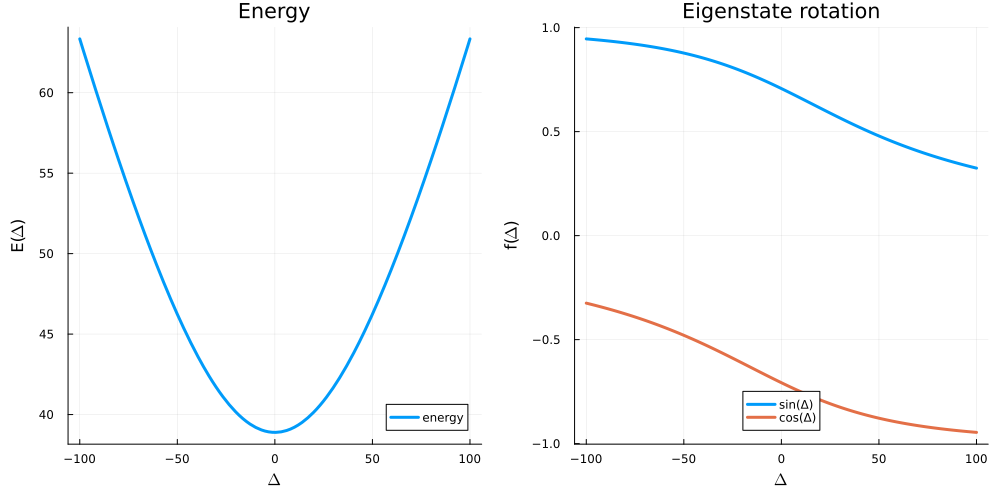

In [33]:
using Plots

# --- Define the constant and functions ---
g = 55.0

# Functions based on the energy/delta formulas
energy(delta) = sqrt(delta^2 + 2 * g^2) / 2
sinetheta(delta) = (sqrt(2) * g) / sqrt(delta^2 + 2 * g^2)
cosinetheta(delta) = delta / sqrt(delta^2 + 2 * g^2)

sine(delta) = sqrt((1 - cosinetheta(delta))/2)
cosine(delta) = -sqrt((1 + cosinetheta(delta))/2)
# Define squared functions simply
sinesq(delta) = (sine(delta))^2
cosinesq(delta) = (cosine(delta))^2

# Define the range
a, b = -100, 100

# --- 1. Generate Plot 1: Plot of energy ---
plot_energy = plot(energy, a, b,
                   label="energy",
                   title="Energy",
                   xlabel="\$\\Delta\$", # Using LaTeX for delta
                   ylabel="E(\$\\Delta\$)",
                   linewidth=3,
                   grid=true,
                   legend=:bottomright,
                    left_margin=5Plots.mm,
                    bottom_margin=5Plots.mm)

# --- 2. Generate Plot 2: Multiple Functions ---
functions_to_plot = [sine, cosine]
function_labels = ["sin(Δ)", "cos(Δ)"]

# To plot multiple functions cleanly, we apply the functions to an x-range vector
x_range = range(a, stop=b, length=500)
y_values = [f.(x_range) for f in functions_to_plot]

plot_multi = plot(
    x_range,
    y_values,
    label=reshape(function_labels, 1, :), # Reshape labels for multiple lines
    title="Eigenstate rotation",
    xlabel="\$\\Delta\$",
    ylabel="f(\$\\Delta\$)",
    linewidth=3,
    grid=true,
    legend=:bottom,
    left_margin=5Plots.mm,
    bottom_margin=5Plots.mm
)

# --- 3. Combine both plots side-by-side ---
# Combine them using the plot() function and specifying a (1, 2) layout.
# The 'size' keyword is optional but helps prevent squishing the plots.
combined_plot = plot(
    plot_energy, 
    plot_multi, 
    layout=(1, 2), 
    size=(1000, 500)
)

# You can now display the combined plot:
# display(combined_plot)
# or save it:
# savefig(combined_plot, "combined_julia_plot.png")